In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


data1= pd.read_csv("/content/applicant.csv")
data2= pd.read_csv("/content/loan.csv")



,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1880194,31,female,divorced/separated/married,1,own,4,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
996,1114064,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,4 years,Registered under the applicant's name,1,Low,NaN,0
997,1758046,38,male,single,1,own,4,skilled employee / official,7 years,NaN,NaN,1,Low,NaN,NaN
998,1824545,23,male,single,1,for free,4,skilled employee / official,1 year,4 years,Registered under the applicant's name,1,Low,NaN,0


In [42]:
data1.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance'],
      dtype='object')

In [43]:
data2.columns

Index(['loan_application_id', 'applicant_id', 'Months_loan_taken_for',
       'Purpose', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Property',
       'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

In [7]:

data1.drop('Balance_in_existing_bank_account_(lower_limit_of_bucket)', axis = 1, inplace = True)
data1.drop('Balance_in_existing_bank_account_(upper_limit_of_bucket)', axis = 1, inplace = True)

In [10]:

data2.drop('Other_EMI_plans', axis = 1, inplace = True)

In [11]:
data1.isnull().sum()

applicant_id                        0
Primary_applicant_age_in_years      0
Gender                              0
Marital_status                      0
Number_of_dependents                0
Housing                             0
Years_at_current_residence          0
Employment_status                   0
Has_been_employed_for_at_least     62
Has_been_employed_for_at_most     253
Telephone                         596
Foreign_worker                      0
Savings_account_balance           183
dtype: int64

In [12]:
data1 = data1[~data1.Telephone.isnull()].copy()
data1 = data1[~data1.Has_been_employed_for_at_least.isnull()].copy()
data1 = data1[~data1.Has_been_employed_for_at_most.isnull()].copy()
data1 = data1[~data1.Savings_account_balance.isnull()].copy()

data1.isnull().sum()


applicant_id                      0
Primary_applicant_age_in_years    0
Gender                            0
Marital_status                    0
Number_of_dependents              0
Housing                           0
Years_at_current_residence        0
Employment_status                 0
Has_been_employed_for_at_least    0
Has_been_employed_for_at_most     0
Telephone                         0
Foreign_worker                    0
Savings_account_balance           0
dtype: int64

In [13]:
data2.isnull().sum()

loan_application_id                              0
applicant_id                                     0
Months_loan_taken_for                            0
Purpose                                         12
Principal_loan_amount                            0
EMI_rate_in_percentage_of_disposable_income      0
Property                                       154
Has_coapplicant                                  0
Has_guarantor                                    0
Number_of_existing_loans_at_this_bank            0
Loan_history                                     0
high_risk_applicant                              0
dtype: int64

In [14]:
data2 = data2[~data2.Property.isnull()].copy()
data2 = data2[~data2.Purpose.isnull()].copy()

data2.isnull().sum()


loan_application_id                            0
applicant_id                                   0
Months_loan_taken_for                          0
Purpose                                        0
Principal_loan_amount                          0
EMI_rate_in_percentage_of_disposable_income    0
Property                                       0
Has_coapplicant                                0
Has_guarantor                                  0
Number_of_existing_loans_at_this_bank          0
Loan_history                                   0
high_risk_applicant                            0
dtype: int64

In [15]:
data1



,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance
7,1705739,35,male,single,1,rent,2,management / self-employed / highly qualified ...,1 year,4 years,Registered under the applicant's name,1,Low
12,1231297,22,female,divorced/separated/married,1,own,1,skilled employee / official,1 year,4 years,Registered under the applicant's name,1,Low
20,1428429,48,male,single,1,own,4,skilled employee / official,1 year,4 years,Registered under the applicant's name,1,Low
25,1138996,36,male,single,1,own,2,unskilled - resident,1 year,4 years,Registered under the applicant's name,1,Low
30,1414851,36,male,married/widowed,1,own,3,skilled employee / official,0 year,1 year,Registered under the applicant's name,1,Very high
...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,1794786,29,female,divorced/separated/married,1,own,4,skilled employee / official,1 year,4 years,Registered under the applicant's name,1,Low
974,1386565,33,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,Registered under the applicant's name,1,Low
982,1782965,28,female,divorced/separated/married,1,own,1,management / self-employed / highly qualified ...,1 year,4 years,Registered under the applicant's name,1,Medium
996,1114064,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,4 years,Registered under the applicant's name,1,Low


In [45]:
data2

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0
6,d68d9bb4-edad-11ea-bb16-0490ef14f12e,1428822,24,FF&E,2835000,3,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,d68fbb24-edad-11ea-8782-4ba4a1f08b11,1615010,12,new vehicle,2390000,4,car or other,0,0,1,existing loans paid back duly till now,0
995,d68fbba6-edad-11ea-80fe-30b2f9300e3d,1880194,12,FF&E,1736000,3,real estate,0,0,1,existing loans paid back duly till now,0
996,d68fbc28-edad-11ea-bc62-4240ac0824fa,1114064,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,0
997,d68fbcaa-edad-11ea-aafc-2de1139e42cd,1758046,12,electronic equipment,804000,4,car or other,0,0,1,existing loans paid back duly till now,0


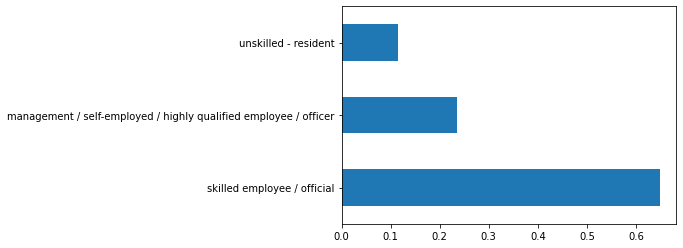

In [22]:
data1.Employment_status.value_counts(normalize=True)


data1.Employment_status.value_counts(normalize=True).plot.barh()
plt.show()


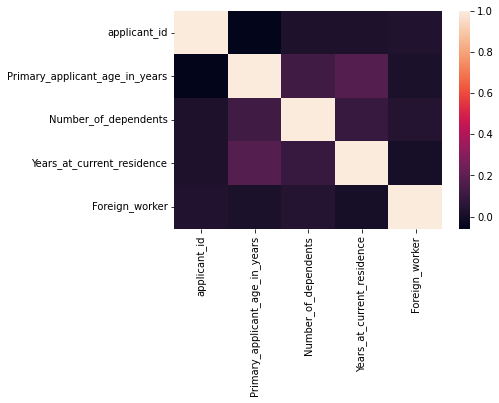

In [17]:
import seaborn as sns
correlation = data1.corr()
sns.heatmap(correlation, xticklabels= correlation.columns, yticklabels= correlation.columns, annot= False)  

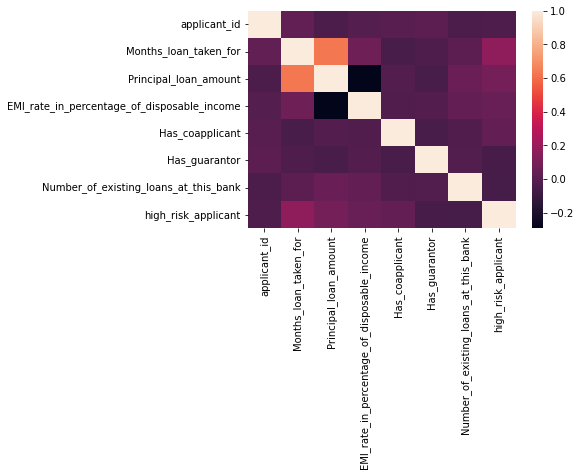

In [36]:
correlation = data2.corr()
sns.heatmap(correlation, xticklabels= correlation.columns, yticklabels= correlation.columns, annot= False)  

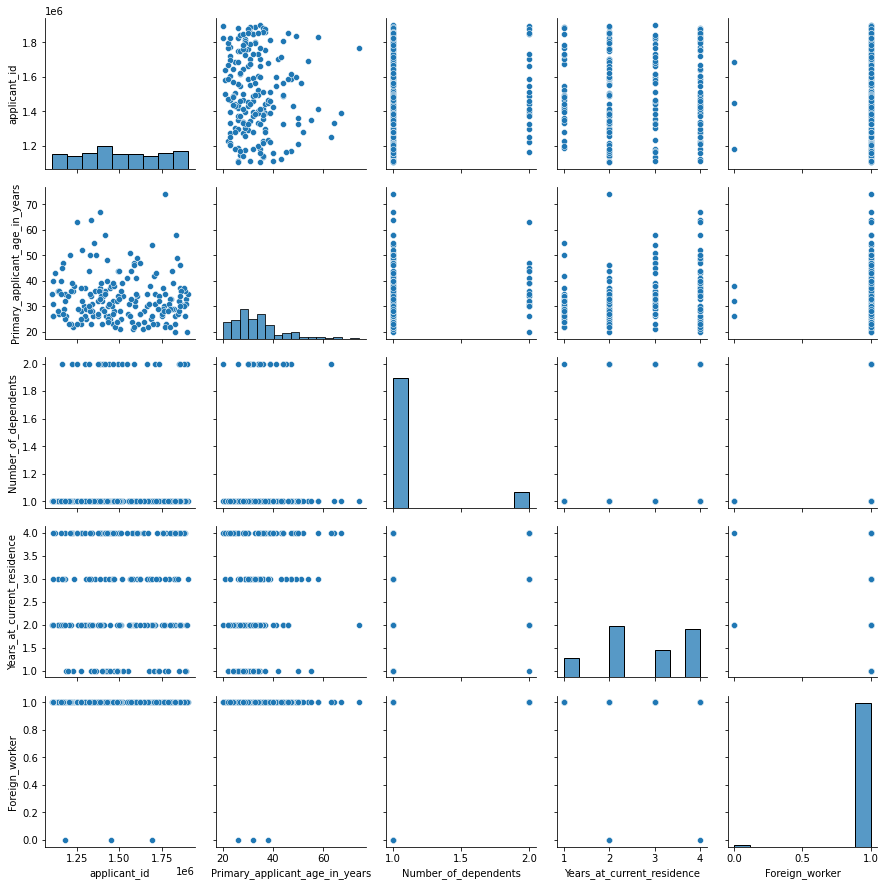

In [18]:
sns.pairplot(data1)

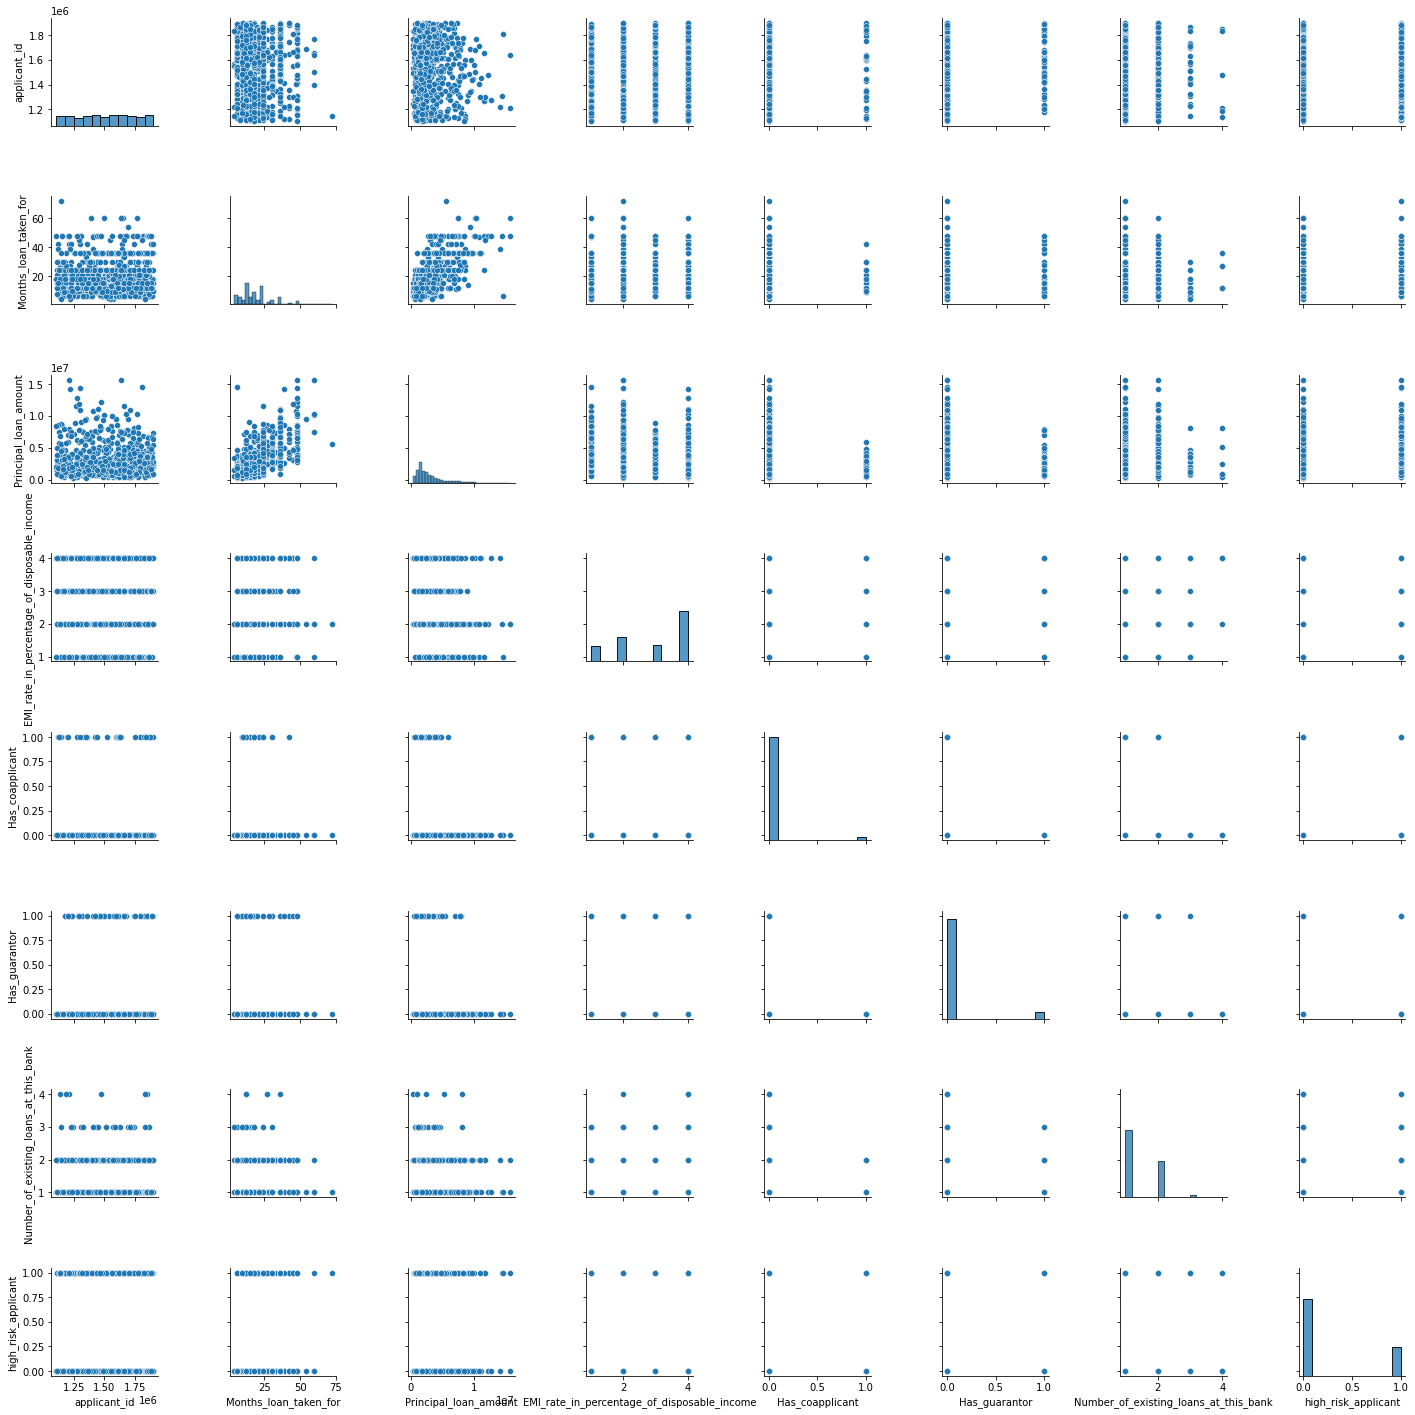

In [38]:
 sns.pairplot(data2)

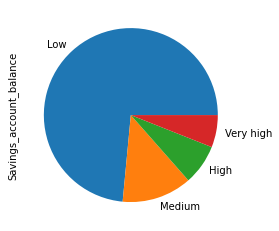

In [40]:
data1.Savings_account_balance.value_counts(normalize=True)

data1.Savings_account_balance.value_counts(normalize=True).plot.pie()
plt.show()

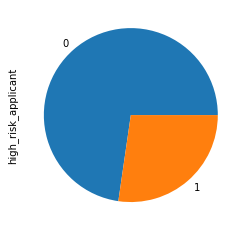

In [51]:
data2.high_risk_applicant.value_counts(normalize=True)

data2.high_risk_applicant.value_counts(normalize=True).plot.pie()
plt.show()

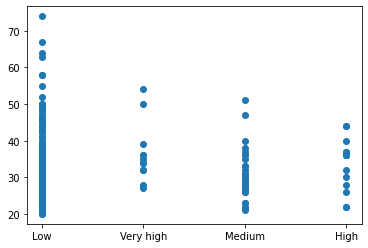

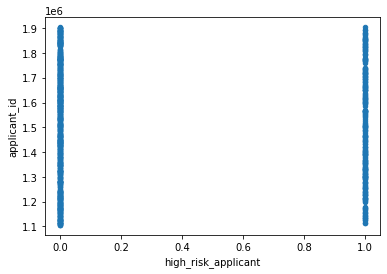

In [34]:
plt.scatter(data1.Savings_account_balance,data1.Primary_applicant_age_in_years)
plt.show()


data2.plot.scatter(x="high_risk_applicant",y="applicant_id")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


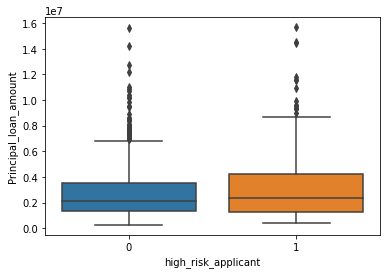

In [47]:
sns.boxplot(data2.high_risk_applicant, data2.Principal_loan_amount)
plt.show()

Marital_status                                      divorced/separated  \
Employment_status                                                        
management / self-employed / highly qualified e...           37.000000   
skilled employee / official                                  38.333333   
unskilled - resident                                         34.000000   

Marital_status                                      divorced/separated/married  \
Employment_status                                                                
management / self-employed / highly qualified e...                   32.083333   
skilled employee / official                                          30.525000   
unskilled - resident                                                 32.888889   

Marital_status                                      married/widowed     single  
Employment_status                                                               
management / self-employed / highly qualified e...      

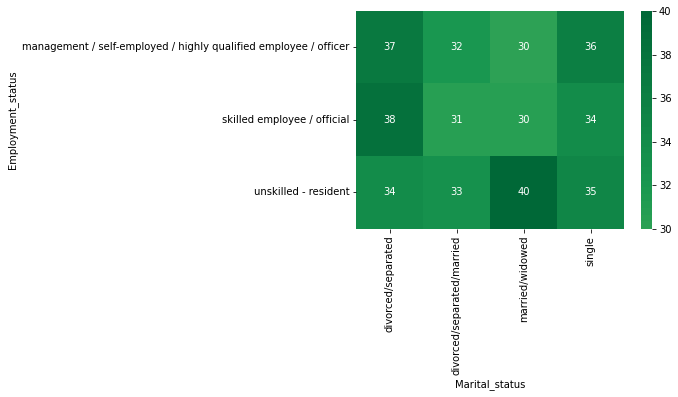

In [50]:
result = pd.pivot_table(data=data1, index='Employment_status', columns='Marital_status',values='Primary_applicant_age_in_years')
print(result)


sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

Q2.Based on Property and months loan taken for.

Q3.Based on this segments it propose to be approved-
Employment status,More saving in account balance,purpose,property,loan history 

Q4. I observed that number of high risk applicants are more beacause most of them have pending loans at other bank.
